In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data=pd.read_csv("../data/preprocessed_data.csv")

In [12]:
data

,Airline,Source,Destination,Duration,stops,class,depature time,arrival time,Price,Date,Season
0,Iberia,ROM,CMN,580,1,business,Morning,Night,4135.95,2024-03-17,Spring
1,Transavia,ROM,CMN,590,1,economy,Early Morning,Afternoon,2443.35,2024-06-01,Summer
2,Lufthansa,ROM,CMN,570,2,economy,Afternoon,Late Night,2156.70,2024-09-03,Autumn
3,Egypt Air,IST,ROM,640,1,business,Late Night,Afternoon,5561.01,2024-02-10,Winter
4,TAROM,IST,PAR,350,1,business,Morning,Afternoon,8097.18,2024-04-18,Spring
...,...,...,...,...,...,...,...,...,...,...,...
4363,Pegasus Airlines,IST,PAR,230,0,economy,Afternoon,Afternoon,3559.92,2024-09-03,Autumn
4364,Iberia,ROM,CMN,505,2,economy,Early Morning,Afternoon,2429.70,2024-01-12,Winter
4365,Turkish Airlines,IST,ROM,160,0,economy,Afternoon,Afternoon,3628.17,2024-08-16,Summer
4366,ITA Airways,ROM,IST,150,0,economy,Morning,Afternoon,1911.00,2024-10-19,Autumn


### data vizualization

Text(0, 0.5, 'Fréquence')

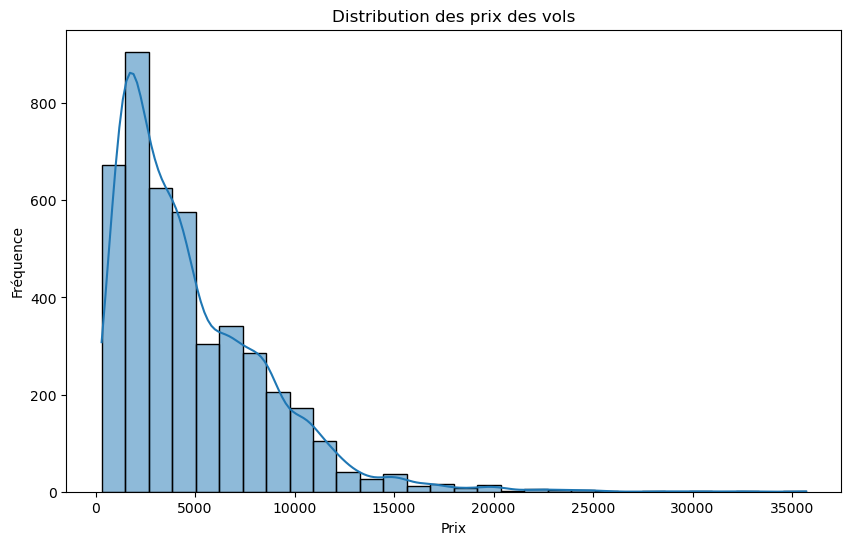

In [14]:
# Create a histogram with a KDE plot for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'],bins=30, kde=True)
plt.title('Distribution des prix des vols')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

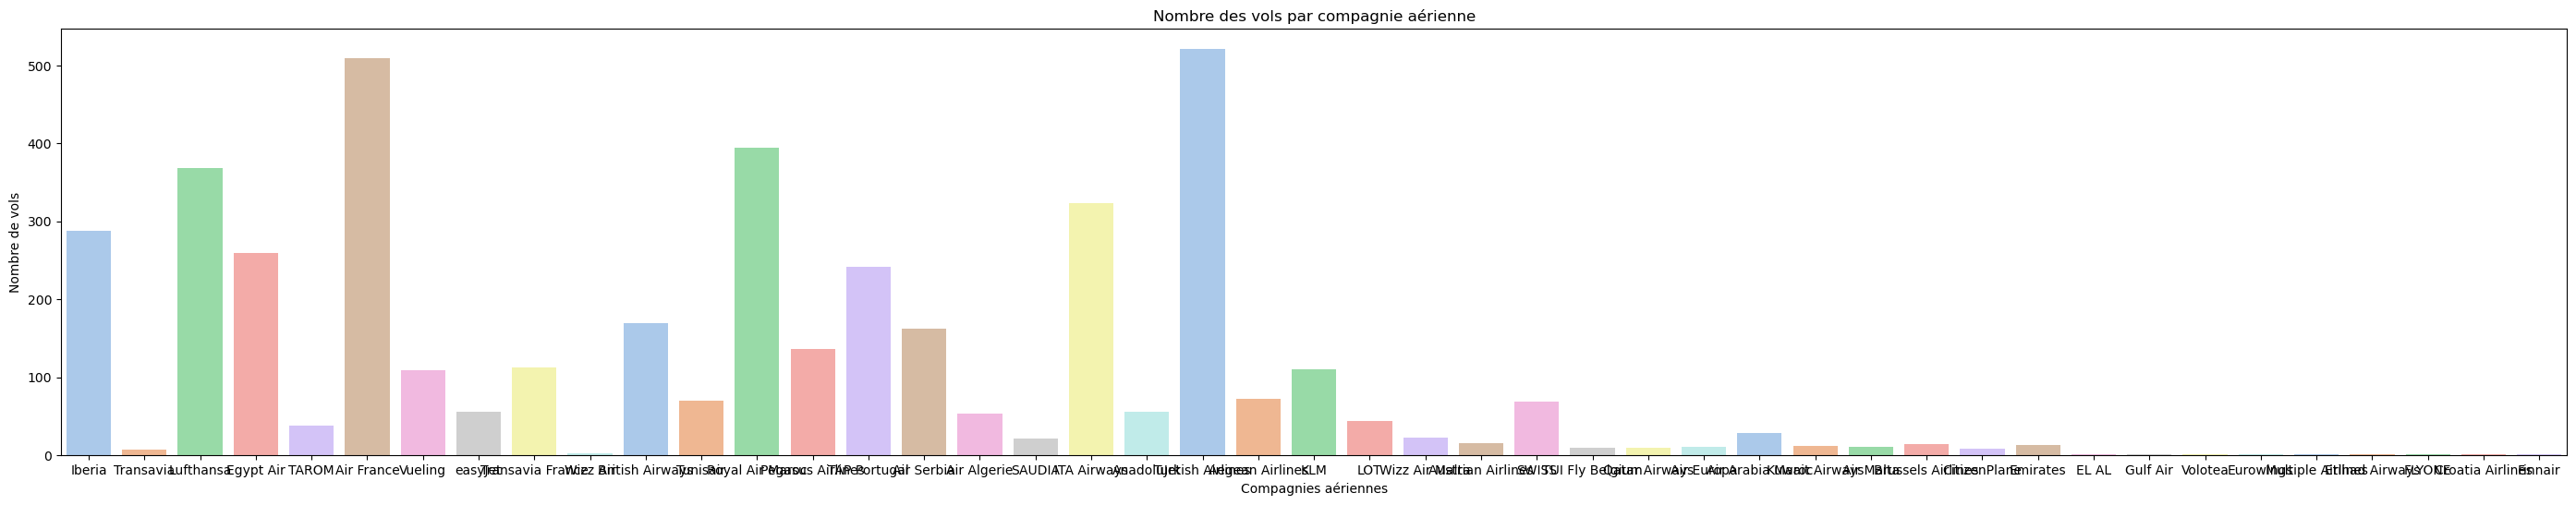

In [22]:
# Create a count plot for airline distribution
plt.figure(figsize=(35, 6))
sns.countplot(x='Airline', data=data, palette="pastel")
plt.title('Nombre des vols par compagnie aérienne')
plt.xlabel('Compagnies aériennes')
plt.ylabel('Nombre de vols')
plt.show()

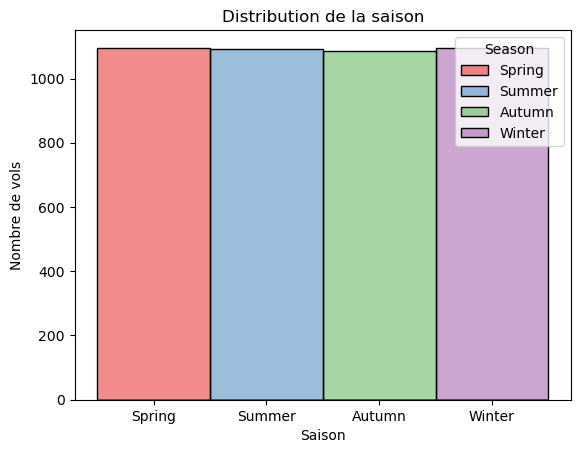

In [28]:
sns.histplot(data=data, x='Season', kde=False, bins=20, hue='Season', palette='Set1')
plt.title('Distribution de la saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de vols')
plt.show()

Text(0, 0.5, 'Prix m')

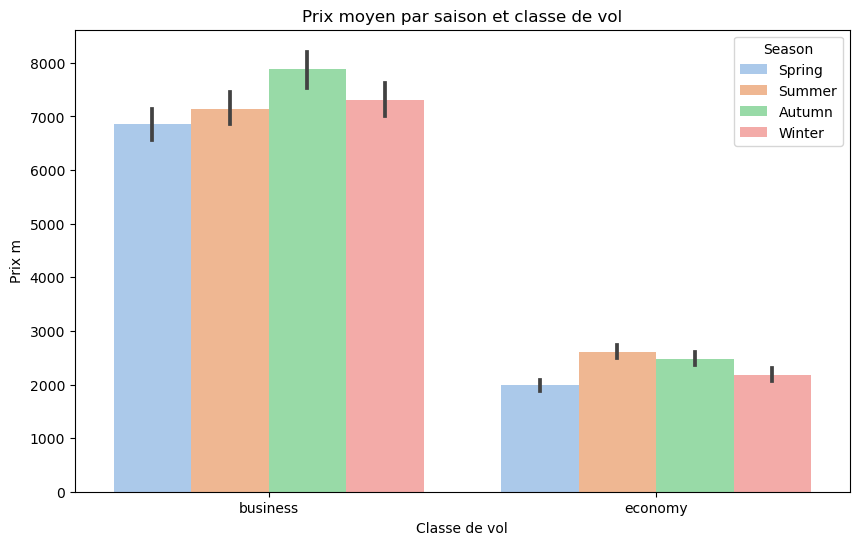

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Price', hue='Season', data=data,palette="pastel")
plt.title('Prix moyen par saison et classe de vol')
plt.xlabel('Classe de vol')
plt.ylabel('Prix m')

In [22]:
import plotly.express as px

fig = px.line(data, 
              x='Season', 
              y='Price', 
              color='Airline',
              markers=True,
              title='Seasonal Price Trends',
              labels={'Season': 'Season', 'Price': 'Average Price'},
              template='plotly_dark')

fig.show()







In [26]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming your DataFrame is named 'data'
fig = px.scatter_geo(data, 
                     locations='Source', # replace 'Source' with your column name
                     locationmode='ISO-3',
                     color='Airline', # replace 'Airline' with your column name
                     title='Flight Routes Map',
                     template='plotly_dark')

# Add lines
for i in range(1, len(data)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'ISO-3',
            lon = [data['lon_Source'][i-1], data['lon_Destination'][i]], # replace 'lon_Source' and 'lon_Destination' with your column names
            lat = [data['lat_Source'][i-1], data['lat_Destination'][i]], # replace 'lat_Source' and 'lat_Destination' with your column names
            mode = 'lines',
            line = dict(width = 2, color = 'blue'),
        )
    )

fig.show()


KeyError: 'lon_Source'

In [6]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(data, x="depature time", y="Price", color="Season", facet_col="arrival time", 
             title="Price distribution by Departure Time, Arrival Time and Season",
             labels={"Price": "Price", "depature time": "Departure Time", "arrival time": "Arrival Time", "Season": "Season"},
             category_orders={"departure time": sorted(data['depature time'].unique()), 
                              "arrival time": sorted(data['arrival time'].unique()),
                              "Season": sorted(data['Season'].unique())})

# Adjust the position of the legend
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()


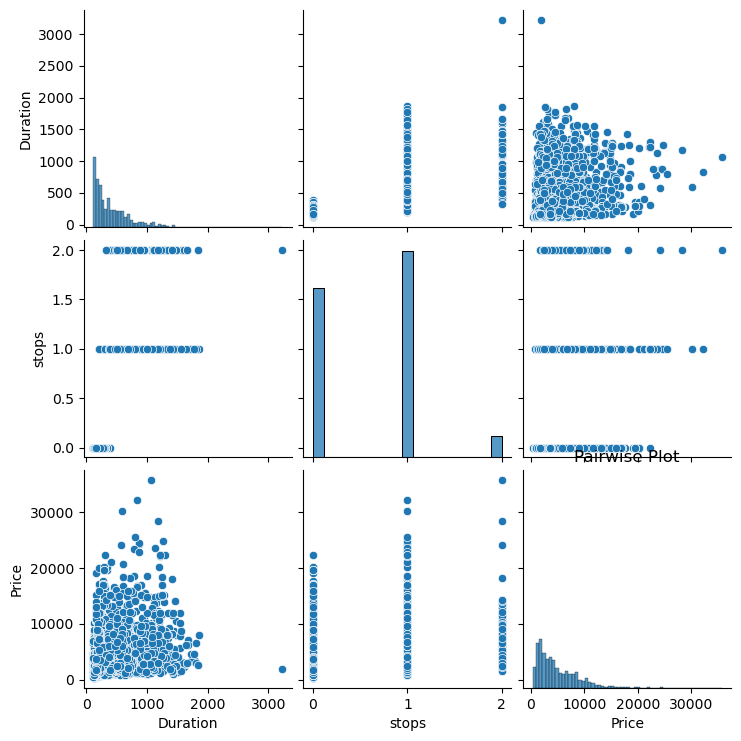

In [15]:
sns.pairplot(data)
plt.title('Pairwise Plot')
plt.show()

In [32]:
import plotly.express as px

fig = px.violin(data, 
                x='class', 
                y='Price', 
                box=True,
                points='all',
                title='Price Distribution by Class',
                labels={'Class': 'Flight Class', 'Price': 'Price (currency)'},
                template='plotly_dark')

fig.show()



In [33]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.scatter(data, 
                 x='Season', 
                 y='Price', 
                 color='Season', 
                 size='Price',
                 facet_col='depature time',  # Assuming there is a typo in your column name 'depature time'
                 facet_row='arrival time',
                 title='Price vs. Season, Departure Time, and Arrival Time',
                 template='plotly_dark')

fig.show()



In [34]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.scatter(data, 
                 x='depature time',  # Assuming there is a typo in your column name 'depature time'
                 y='Price', 
                 color='Season',
                 size='Price',
                 facet_row='arrival time',
                 title='Price vs. Departure Time and Arrival Time',
                 template='plotly_dark')

fig.show()


In [35]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.violin(data, 
                x='stops', 
                y='Price', 
                color='stops',
                title='Violin Plot of Price by Stops',
                template='plotly_dark')

fig.show()


In [36]:
import plotly.express as px


fig = px.bar(data.groupby('Airline')['Price'].mean().reset_index(), 
             x='Airline', 
             y='Price',
             title='Average Price by Airline',
             template='plotly_dark')

fig.show()


In [39]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.sunburst(data, 
                  path=['Source', 'Destination'], 
                  values='Price',
                  title='Sunburst Chart of Price by Source and Destination',
                  template='plotly_dark')

fig.show()




In [41]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.imshow(data.groupby(['Season', 'depature time'])['Price'].mean().unstack(), 
                x=data['depature time'].unique(),
                y=data['Season'].unique(),
                title='Heatmap of Average Price by Season and Departure Time',
                template='plotly_dark')

fig.show()



In [46]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.choropleth(data, 
                    locations='Source', # replace 'Source' with your column name
                    color='Airline', # replace 'Airline' with your column name
                    title='Choropleth Map',
                    template='plotly_dark')

fig.show()


In [47]:
import plotly.express as px

fig = px.scatter_geo(data, 
                     locations='Source',
                     locationmode='ISO-3',
                     color='Airline', 
                     title='Flight Routes Map',
                     template='plotly_dark')

fig.show()


In [ ]:
²